# Financiamento Imobiliário

Neste notebook são derivadas fórmulas relativas ao financimento de imóveis segundo o sistema SAC e implementadas  e simuladas para um caso específico.



# Derivações de fórmulas

## Definições



- $V$: valor do imóvel
- $E$: valor de entrada
- $F$: valor do financiamento = $V - E$ 
- $\tau$: taxa de juros (efetiva) mensal
- $t$: mês
- $T$: prazo do financiamento em meses
- $D$: saldo devedor




Por definição, temos que a parcela $P$ a ser paga num determinado mês $t$ é dada pelo valor a ser amortizado $A(t)$ somado aos juros $j(t)$:

$$P(t) = A(t) + J(t).$$

O valor de amortização é constante e dado pela valor financiamento dividido pelo número total de parcelas a serem pagas:

$$A(t) = \frac{F}{T} = \frac{V - E}{T}.$$

Já o juros $J(t)$ é o juros sobre o saldo devedor no mês $t$: $D(t)$, ou seja:

$$J(t) = \tau D(t).$$

O salvo devedor $D(t)$ é o valor do financiamento $F$ menos o total que já foi amortizado até o mês $t$, que nada mais é do que o número de meses anteriores ($t-1$) multiplicado pelo valor da amortização $A$:

$$D(t) = F - (t-1)A = F - (t-1)\frac{F}{T} = F\left (1 - \frac{t-1}{T}\right).$$

Portanto, temos então para o valor da parcela:

$$P(t) = A + J(t) = \frac{F}{T} + \tau F\left (1 - \frac{t-1}{T}\right).$$ 

Podemos dividir a equação acima pelo valor do Financiamento $F$, para termos grandezas normalizadas como frações de $F$, que denotamos por suas respectivas letras minúsculas:

$$p(t) = a + j(t) = \frac{1}{T} + \tau \left (1 - \frac{t-1}{T}\right).$$ 

A equação acima é linear em $t$, ou seja, a parcela decresce linearmente com o mês:

$$p(t)  = -\alpha t + \beta,$$

onde

$$\alpha = \frac{\tau}{T},\quad \beta = \frac{1}{T} + \tau \left(1 + \frac{1}{T}\right).$$

Algo interessante de se calcular é o total a ser pago ao longo de todo financiamento, que é dado pela soma das parcelas:

$$\mathcal{f} = \sum\limits_{t=1}^T p(t) = \beta T - \alpha  \sum\limits_{t=1}^T t = \beta T - \alpha\frac{T(T+1)}{2}$$

$$\Rightarrow \mathcal{f} = T\left[ \frac{1}{T} + \tau \left(1 + \frac{1}{T}\right)\right] - \frac{\tau}{2}(T+1)$$

$$ \Rightarrow \mathcal{f} = 1 + \tau \left(\frac{T+1}{2}\right).$$

Lembrando que esse valor é normalizado em função do valor do financiamento $F$, podemos calcular explicitamente o valor total pago, $\mathcal{V}$, considerando um valor de imóvel $V$ e um valor de entrada $E$: 

$$\mathcal{V} = E + f  F = E + (V-E)f.$$

Definindo $\epsilon:=E/V$ como a fração da entrada em relação ao valor do imóvel $V$ e dividindo a equação acima por $V$, obtemos o % pago em relação ao valor do imóvel, $v$, obtemos:

$$v = \frac{\mathcal{V}}{V} = \epsilon + (1-\epsilon)\left[1 + \tau \left(\frac{T+1}{2}\right)\right].$$

Podemos também escrever o valor da parcela em relação ao valor to imóvel. Considerando uma entrada $E$, temos  de $V = E + F$ que $F = V - E = V(1-\epsilon)$. Então:

$$p_V(t) = (1-\epsilon) p(t)  = (1-\epsilon)\left( \frac{1}{T} + \tau \left (1 - \frac{t-1}{T}\right)\right).$$

# Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

In [2]:
sns.set_style('whitegrid')

# Funções

In [3]:
def j(mes, taxa_de_juros_ao_mes, prazo_em_meses):
    return taxa_de_juros_ao_mes * (1 - (mes-1)/prazo_em_meses)

def v(fracao_entrada, taxa_de_juros_ao_mes, prazo_em_meses):
    return fracao_entrada + (1 - fracao_entrada)* (1 + taxa_de_juros_ao_mes * (prazo_em_meses+1)/2 )


def p(mes, taxa_de_juros_ao_mes, prazo_em_meses):
    return 1/prazo_em_meses + j(mes, taxa_de_juros_ao_mes, prazo_em_meses)

def p_v(fracao_entrada, mes, taxa_de_juros_ao_mes, prazo_em_meses):
    return (1 - fracao_entrada) * p(mes, taxa_de_juros_ao_mes, prazo_em_meses)


def converte_para_taxa_mensal(taxa_anual):
    return (1 + taxa_anual)**(1/12)-1

In [30]:
pct_fmt = mtick.PercentFormatter(xmax=1)

# Simulação

## dados de entrada

In [50]:
prazo_em_meses = 360 # 30 anos
taxa_de_juros_ao_ano = 0.1061

valor_do_imóvel = 520000
valor_da_entrada = 300000

valor_do_financiamento = valor_do_imóvel - valor_da_entrada
fracao_entrada = valor_da_entrada/valor_do_imóvel

## parcelas ao longo dos meses

In [5]:
taxa_de_juros_ao_mes = converte_para_taxa_mensal(taxa_de_juros_ao_ano)

meses = np.arange(1, prazo_em_meses + 1)
parcelas = p(meses, taxa_de_juros_ao_mes, prazo_em_meses)
juros = j(meses, taxa_de_juros_ao_mes, prazo_em_meses)
amortização = parcelas - juros

Juros = valor_do_financiamento * juros
Parcelas = valor_do_financiamento * parcelas
Amortização = valor_do_financiamento * amortização

Text(0.5, 0, 'mês')

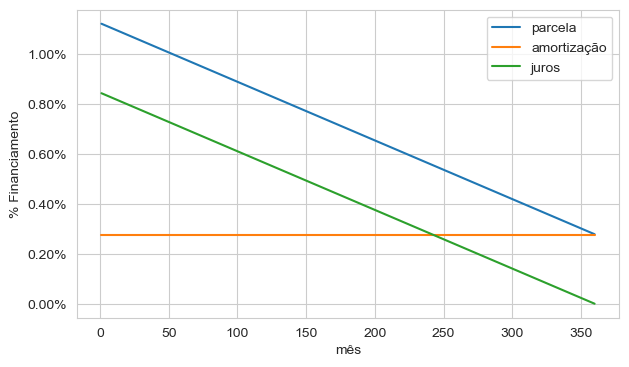

In [23]:
f, ax = plt.subplots(1,1,figsize=(7,4))

ax.plot(meses, parcelas, label='parcela')
ax.plot(meses, amortização, label='amortização')
ax.plot(meses, juros, label='juros')

ax.legend(loc='best')

ax.yaxis.set_major_formatter(pct_fmt)
ax.set_ylabel("% Financiamento")
ax.set_xlabel('mês')

Text(0.5, 0, 'mês')

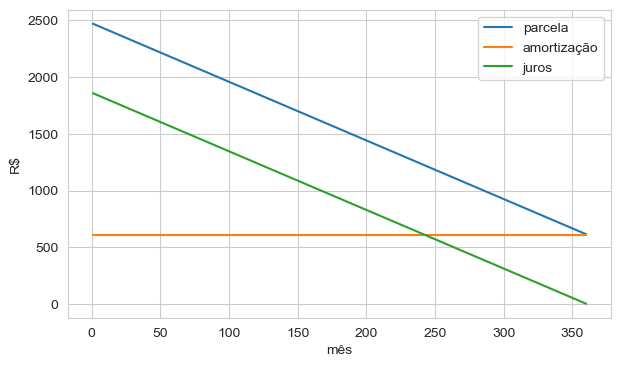

In [66]:
f, ax = plt.subplots(1,1,figsize=(7,4))

ax.plot(meses, Parcelas, label='parcela')
ax.plot(meses, Amortização, label='amortização')
ax.plot(meses, Juros, label='juros')

ax.legend(loc='best')
ax.set_ylabel("R$")
ax.set_xlabel('mês')

Text(0.5, 0, 'ano')

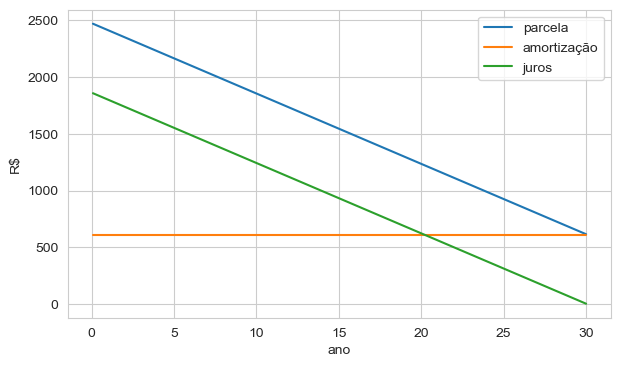

In [67]:
f, ax = plt.subplots(1,1,figsize=(7,4))

ax.plot(meses/12, Parcelas, label='parcela')
ax.plot(meses/12, Amortização, label='amortização')
ax.plot(meses/12, Juros, label='juros')

ax.legend(loc='best')
ax.set_ylabel("R$")
ax.set_xlabel('ano')

Text(0.5, 0, 'mês')

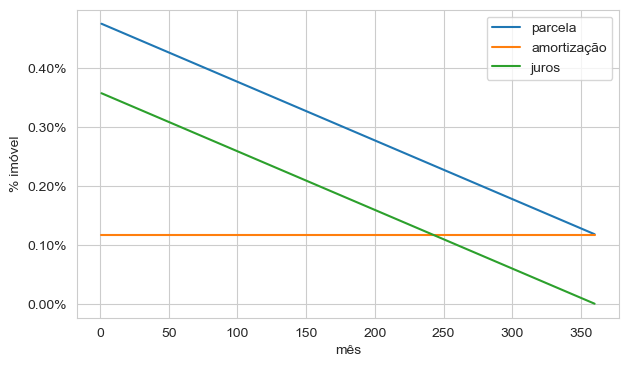

In [24]:
f, ax = plt.subplots(1,1,figsize=(7,4))

ax.plot(meses, Parcelas/valor_do_imóvel, label='parcela')
ax.plot(meses, Amortização/valor_do_imóvel, label='amortização')
ax.plot(meses, Juros/valor_do_imóvel, label='juros')

ax.yaxis.set_major_formatter(pct_fmt)
ax.legend(loc='best')
ax.set_ylabel("% imóvel")
ax.set_xlabel('mês')

Text(0.5, 1.0, 'fração entrada: R$ 300000')

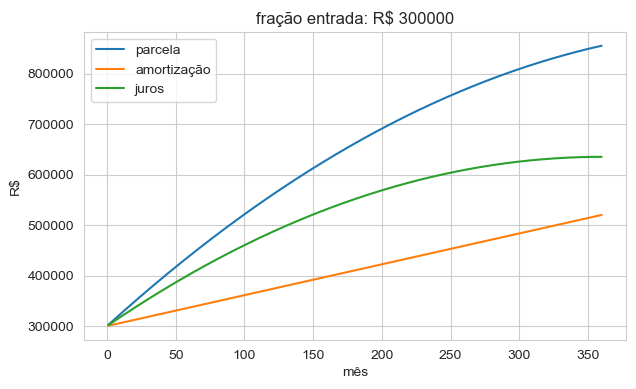

In [69]:
f, ax = plt.subplots(1,1,figsize=(7,4))

Valor_pago_acumulado = (valor_da_entrada + Parcelas.cumsum())
Valor_amortizado_acumulado = (valor_da_entrada + Amortização.cumsum())
Valor_juros_acumulado = (valor_da_entrada + Juros.cumsum())

ax.plot(meses, Valor_pago_acumulado, label='parcela')
ax.plot(meses, Valor_amortizado_acumulado, label='amortização')
ax.plot(meses, Valor_juros_acumulado, label='juros')


ax.legend(loc='best')
ax.set_ylabel("R$")
ax.set_xlabel('mês')
ax.set_title(f'fração entrada: R$ {np.round(valor_da_entrada, 0)}')

Text(0.5, 1.0, 'fração entrada: 58.0%')

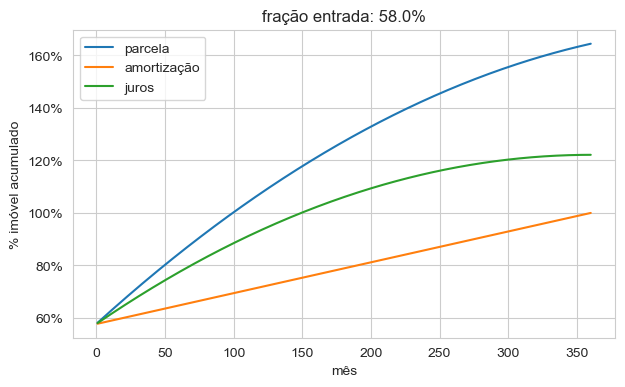

In [60]:
f, ax = plt.subplots(1,1,figsize=(7,4))

valor_pago_acumulado = Valor_pago_acumulado/valor_do_imóvel
valor_amortizado_acumulado = Valor_amortizado_acumulado/valor_do_imóvel
valor_juros_acumulado = Valor_juros_acumulado/valor_do_imóvel

ax.plot(meses, valor_pago_acumulado, label='parcela')
ax.plot(meses, valor_amortizado_acumulado, label='amortização')
ax.plot(meses, valor_juros_acumulado, label='juros')

ax.yaxis.set_major_formatter(pct_fmt)
ax.legend(loc='best')
ax.set_ylabel("% imóvel acumulado")
ax.set_xlabel('mês')
ax.set_title(f'fração entrada: {np.round(valor_da_entrada/valor_do_imóvel*100, 0)}%')

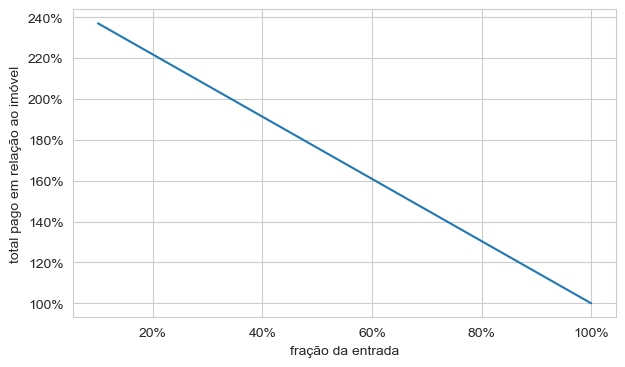

In [29]:
fracao_entrada = np.arange(0.1, 1.1, 0.1)

f, ax = plt.subplots(1,1,figsize=(7,4), dpi=100)

fracao_valor_total = v(fracao_entrada, taxa_de_juros_ao_mes, prazo_em_meses)
ax.plot(fracao_entrada, fracao_valor_total)

ax.set_xlabel('fração da entrada')
ax.set_ylabel('total pago em relação ao imóvel')
ax.xaxis.set_major_formatter(pct_fmt)
ax.yaxis.set_major_formatter(pct_fmt)